# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


### Now take a look at the shapes of the X and y matricies 

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [43]:
a = X[36000]

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [21]:
import matplotlib.pyplot as plt
import matplotlib

In [44]:
X_digit_image= a.reshape(28,28)

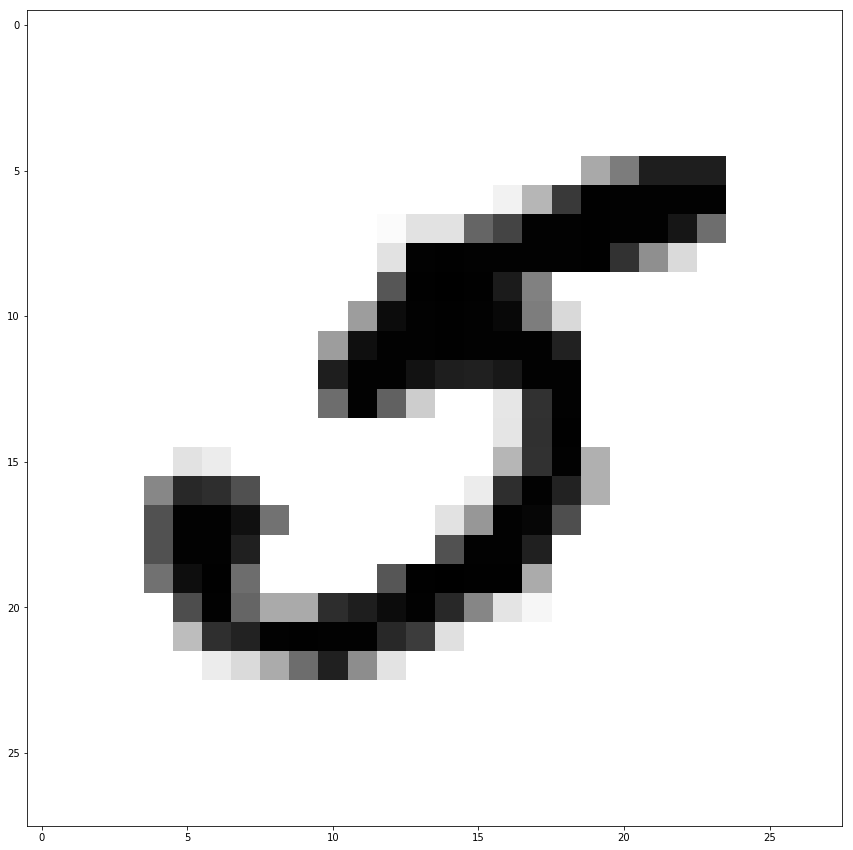

In [45]:
plt.figure(figsize=(15, 15))
plt.imshow(X_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [51]:
y[36000]

5.0

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [86]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [81]:
y_5 = np.array(list(map(lambda x: 1 if x == 5 else 0, y)))

In [83]:
y_5.shape

(70000,)

In [88]:
y_train_5 = y_5[:60000]
y_test_5 = y_5[60000:]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [84]:
from sklearn.linear_model import LogisticRegression

In [89]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_5)

/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [93]:
predict = log_reg.predict(X)

In [97]:
predict[36000]

1

Yes, it predicted well. 1 is 5.

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [98]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [99]:
never_5_clf.fit(X_train, y_train_5)

In [100]:
never_5_clf.predict(X)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?